In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

### Reading from Data

In [2]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Understanding the Data

In [3]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
new_names = {'Ship Mode': 'shipmode',
             'Segment': 'segment',
             'Country': 'country',
             'City': 'city',
             'State': 'state',
             'Postal Code': 'zipcode',
             'Region': 'region',
             'Category': 'category',
             'Sub-Category': 'subcategory',
             'Sales': 'sales',
             'Quantity': 'quantity',
             'Discount': 'disc',
             'Profit': 'profit'}  # Assuming 'Profit' already exists

data = data.rename(columns=new_names)

In [5]:
data.head(2)

,shipmode,segment,country,city,state,zipcode,region,category,subcategory,sales,quantity,disc,profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820


In [6]:
data.shipmode.unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [7]:
data.segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [8]:
data = data.drop(columns=['country'])
data.head(2)

,shipmode,segment,city,state,zipcode,region,category,subcategory,sales,quantity,disc,profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820


In [9]:
data.subcategory.unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

### Exploratory Data Analysis

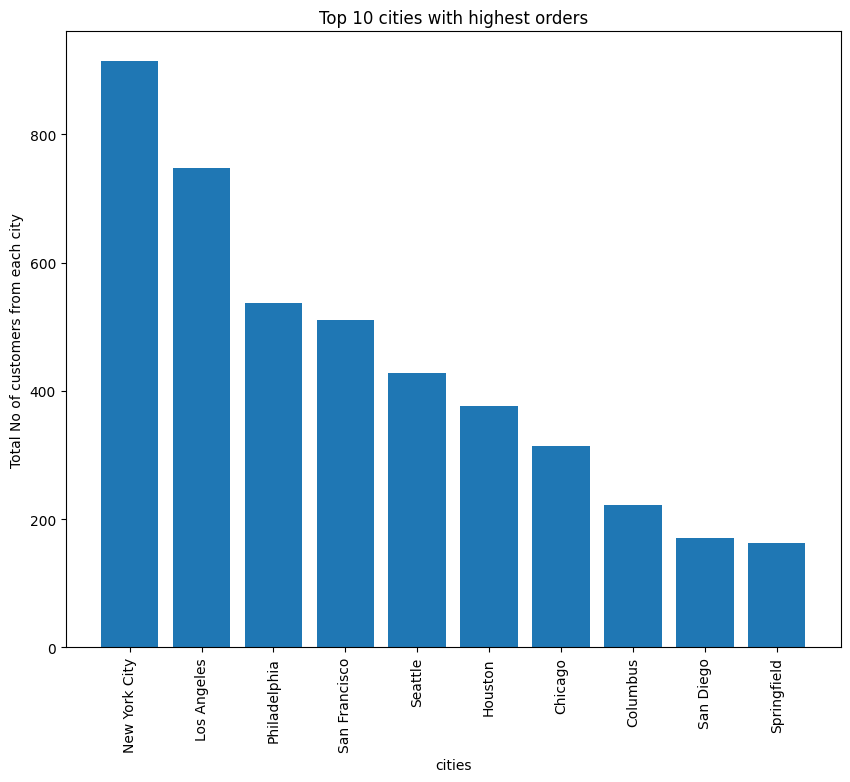

In [10]:
city_counts = data['city'].value_counts()

# Extract the city names and their counts
cities = city_counts.index
counts = city_counts

city = []
count = []
for i in range(0,10):
    city.append(cities[i])
    count.append(counts[i])
    
plt.figure(figsize=(10,8))
plt.bar(city,count)
plt.xlabel('cities')
plt.ylabel('Total No of customers from each city')
plt.title('Top 10 cities with highest orders')
plt.xticks(rotation=90,fontsize=10)
plt.show()

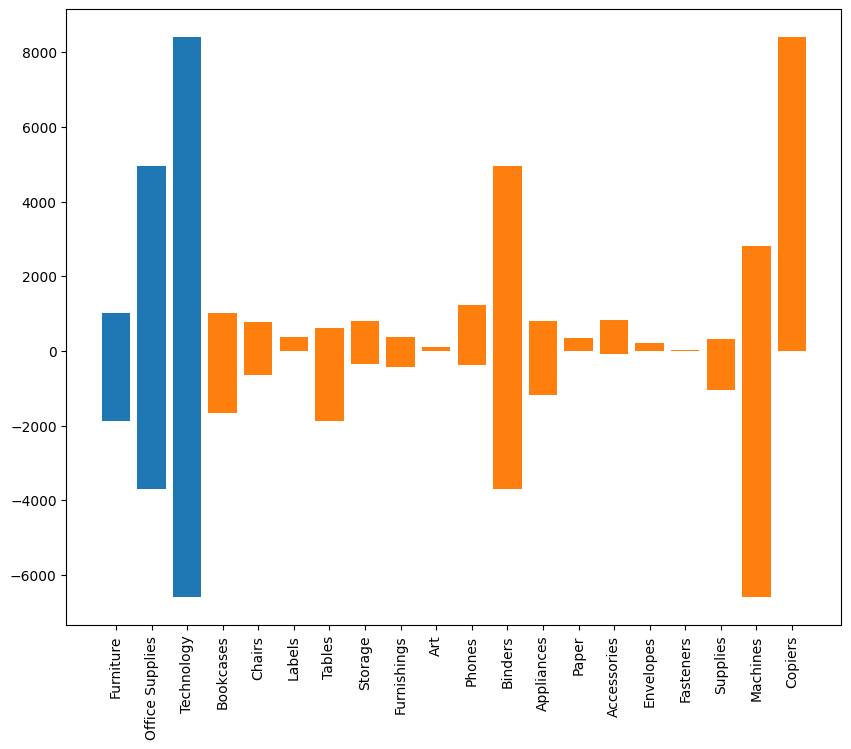

In [11]:
plt.figure(figsize=(10,8))
plt.bar(data.category,data.profit)
plt.bar(data.subcategory,data.profit)
plt.xticks(rotation=90)
plt.show()

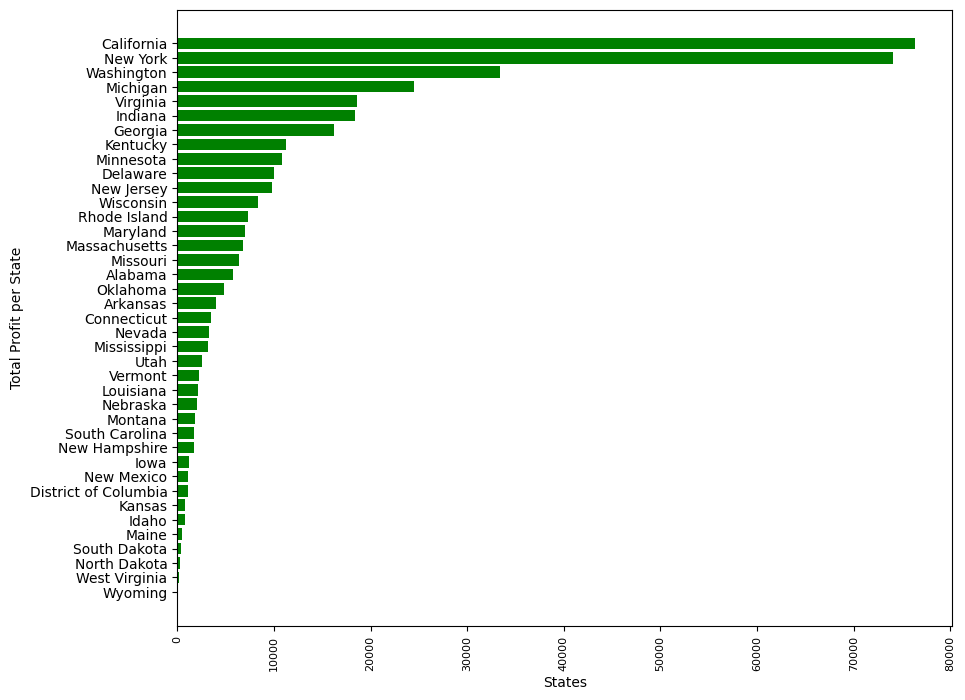

In [12]:
state_profits = data.groupby('state')['profit'].sum()

# Get the top 5 states by the number of orders
# top_states = data['state'].value_counts().head(20).index

# Extract the profits for these top 5 states
profitable_states = state_profits[state_profits > 0]
sorted_profitable_states = profitable_states.sort_values()
# Plot the bar chart
plt.figure(figsize=(10, 8))
plt.barh(sorted_profitable_states.index, sorted_profitable_states.values,color='green')
plt.xlabel('States')
plt.ylabel('Total Profit per State')
plt.xticks(rotation=90, fontsize=8)
plt.show()

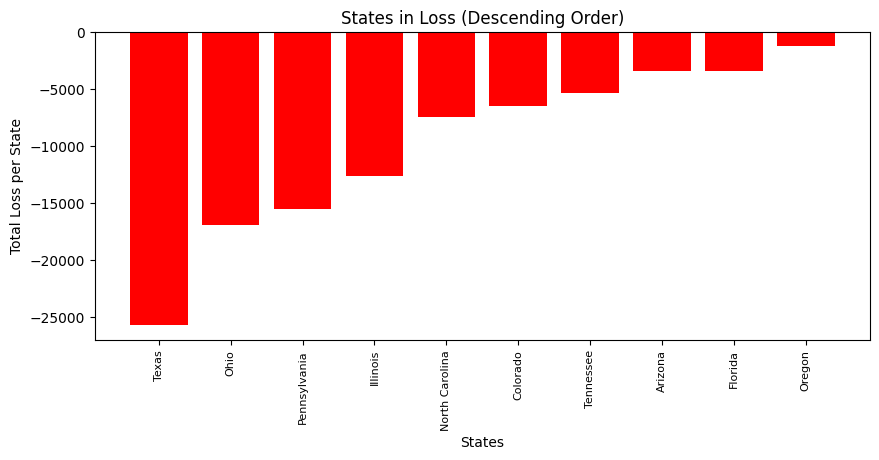

In [13]:
state_profits = data.groupby('state')['profit'].sum()

# Filter states with negative profits
loss_states = state_profits[state_profits < 0]

# Sort states based on their profit in descending order
loss_states_sorted = loss_states.sort_values(ascending=True)

# Plot the bar chart with bars arranged in descending order
plt.figure(figsize=(10, 4))
plt.bar(loss_states_sorted.index, loss_states_sorted.values, color='red')  # Change 'red' to any color you prefer
plt.xlabel('States')
plt.ylabel('Total Loss per State')
plt.xticks(rotation=90, fontsize=8)
plt.title('States in Loss (Descending Order)')
plt.show()

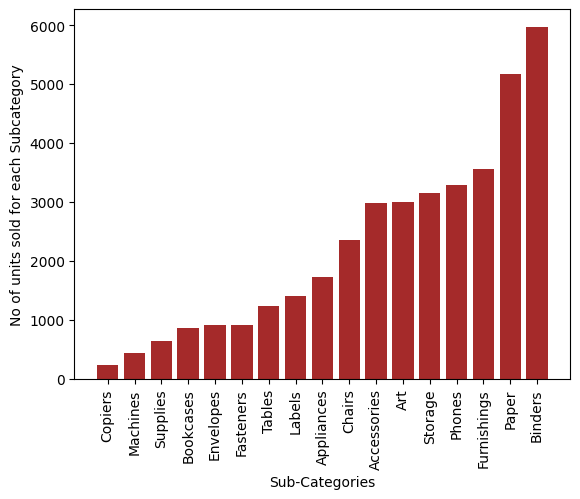

In [14]:
subcategory_quantity = data.groupby('subcategory')['quantity'].sum().sort_values()
# quant = data.groupby('subcategory')['quantity'].sum().sort_values()
plt.bar(subcategory_quantity.index,subcategory_quantity.values,color='brown')
plt.xticks(rotation=90)
plt.xlabel('Sub-Categories')
plt.ylabel('No of units sold for each Subcategory')
plt.show()

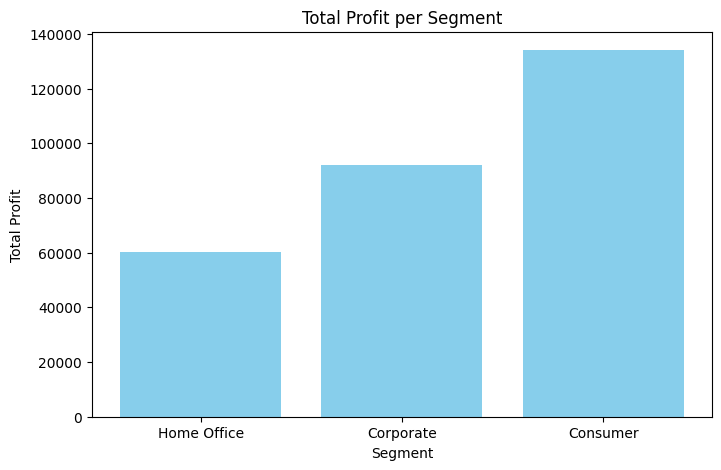

In [15]:
segment_profits = data.groupby('segment')['profit'].sum().sort_values()
# Extract the segments and their corresponding profits
seg = segment_profits.index
profit = segment_profits.values
# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(seg, profit, color='skyblue')
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.title('Total Profit per Segment')
plt.show()

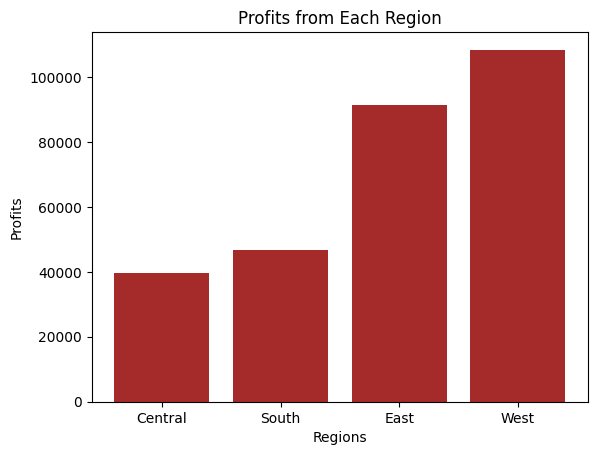

In [16]:
region_profit = data.groupby('region')['profit'].sum().sort_values()
plt.bar(region_profit.index,region_profit.values,color='brown')
plt.xlabel('Regions')
plt.ylabel('Profits')
plt.title('Profits from Each Region')
plt.show()